In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Activation
from tensorflow.keras import optimizers
import tensorflow as tf

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only allocate 4GB of memory on the first GPU
    try:
        tf.config.experimental.set_virtual_device_configuration(
        gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=4096)])
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [5]:
def create_sine_data(n = 300):
    np.random.seed(32)
    n = 300
    x = np.linspace(0, 2*np.pi, n)
    y1 = 3*np.sin(x)
    y1 = np.concatenate((np.zeros(60), y1+np.random.normal(0,0.15*np.abs(y1),n),np.zeros(60)))
    x=np.concatenate((np.linspace(-3,0,60),np.linspace(0,3*2*np.pi,n),np.linspace(3*2*np.pi,3*2*np.pi+3,60)))
    y2 = 0.1*x+1
    y=y1+y2
    return x,y

Text(0.5, 1.0, 'Simulated Data')

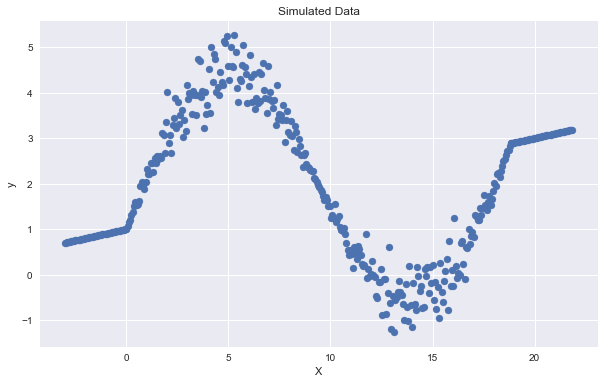

In [6]:
x, y = create_sine_data()
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x=x, y=y, marker="o")
ax.set_xlabel("X")
ax.set_ylabel("y")
ax.set_title("Simulated Data")

# Modelo NN lineal

In [7]:
model = Sequential()
model.add(
    Dense(
        1,
        activation = "linear",
        batch_input_shape=(None, 1)
    )
)

In [8]:

model.compile(loss="mean_squared_error", optimizer="adam")

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(x, y, batch_size=16, epochs=100, verbose=0)

In [12]:
model.evaluate(x, y, verbose=2)

14/14 - 0s - loss: 2.4820


2.4820168018341064

Text(0, 0.5, 'y')

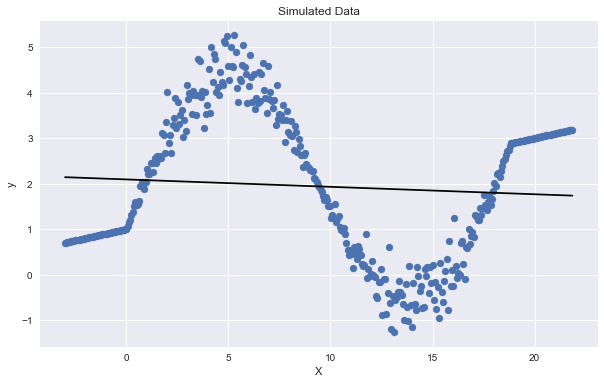

In [13]:
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(x, y, marker="o")

ax.plot(x, model.predict(x), c="k")

ax.set_title("Simulated Data")

ax.set_xlabel("X")

ax.set_ylabel("y")

# NN no lineal

In [14]:
model = Sequential()

model.add(
    Dense(
        20,
        activation="relu",
        batch_input_shape=(None, 1)
    )
)

model.add(
    Dense(
        50,
        activation="relu",
        batch_input_shape=(None, 1)
    )
)

model.add(
    Dense(
        20,
        activation="relu",
        batch_input_shape=(None, 1)
    )
)

model.add(
    Dense(
        1, 
        activation="linear"
    )
)

In [16]:
model.compile(loss="mean_squared_error", optimizer="adam")
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                40        
_________________________________________________________________
dense_2 (Dense)              (None, 50)                1050      
_________________________________________________________________
dense_3 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 21        
Total params: 2,131
Trainable params: 2,131
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = model.fit(
    x,y,
    batch_size=16,
    epochs=200,
    verbose=0
)

In [18]:
model.evaluate(x, y, verbose=2)

14/14 - 0s - loss: 0.0778


0.07776394486427307

Text(0, 0.5, 'y')

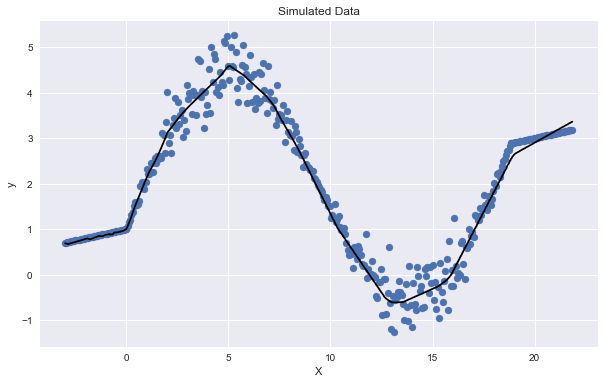

In [19]:
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(x, y, marker="o")

x_values = np.linspace(-3, 6*np.pi+3, 1000)

ax.plot(x_values, model.predict(x_values), c="k")

ax.set_title("Simulated Data")

ax.set_xlabel("X")

ax.set_ylabel("y")

In [20]:
model = Sequential()

model.add(
    Dense(
        20, 
        activation="sigmoid",
        batch_input_shape=(None, 1),
    )
)

model.add(
    Dense(
        50,
        activation="sigmoid",
    )
)

model.add(
    Dense(
        20,
        activation="sigmoid",
    )
)

model.add(
    Dense(
        1,
        activation="linear"
    )
)

In [21]:
model.compile(loss="mean_squared_error", optimizer="adam")
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 20)                40        
_________________________________________________________________
dense_6 (Dense)              (None, 50)                1050      
_________________________________________________________________
dense_7 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 21        
Total params: 2,131
Trainable params: 2,131
Non-trainable params: 0
_________________________________________________________________


In [22]:
history = model.fit(
    x, y,
    batch_size=16,
    epochs=200,
    verbose=0,
)

In [23]:
model.evaluate(x, y, verbose=2)

14/14 - 0s - loss: 0.8165


0.8165386319160461

Text(0, 0.5, 'y')

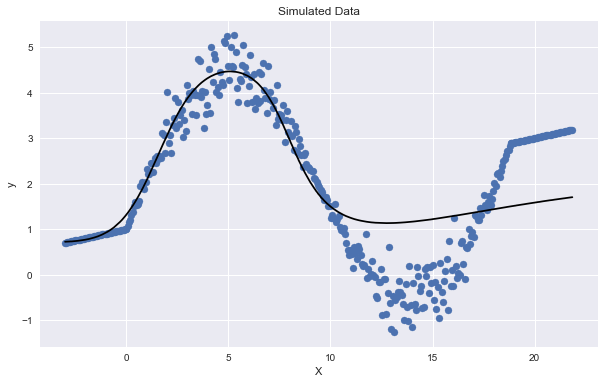

In [25]:
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(x, y, marker="o")

x_values = np.linspace(-3, 6*np.pi+3, 1000)

ax.plot(x_values, model.predict(x_values), c="k")

ax.set_title("Simulated Data")

ax.set_xlabel("X")

ax.set_ylabel("y")